### Thresholding segmentation generator

0.9740797613084922
(192, 192, 56)


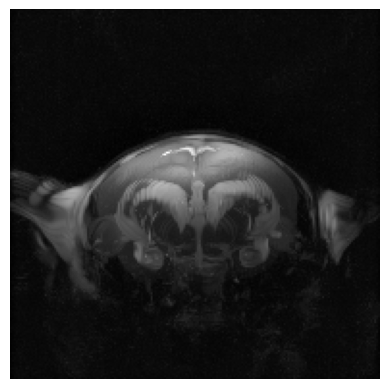

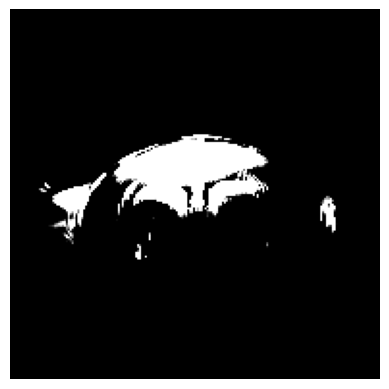

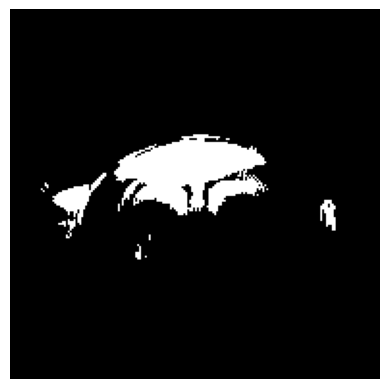

In [1]:
# generating thresholding segmentation
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

masked_raw_img_path = '../single_data/prep_mouse/prep_G1_rare.nii.gz'
masked_raw_img_arr = nib.load(masked_raw_img_path).get_fdata()
# mask_path = "../data_t2/derived/derived/sub-01/T2s/masks/Denoi_BiasCor_S0_cleaned_mask.nii"
# mask = nib.load(mask_path).get_fdata()
# masked_raw_img_arr = np.multiply(masked_raw_img_arr, mask)

# p_lower, p_higher = np.percentile(masked_raw_img_arr, (70, 100))
# print(p_lower, p_higher)
p_lower = 4.872
p_higher = 5.163

img_rescale = exposure.rescale_intensity(masked_raw_img_arr, in_range=(p_lower, p_higher))

img_mip = np.max(masked_raw_img_arr, axis=2)
img_mip = np.rot90(img_mip, k=1, axes=(0,1))
plt.figure()
plt.axis('off')
plt.imshow(img_mip, cmap='gray')

img_rescale_mip = np.max(img_rescale, axis=2)
img_rescale_mip = np.rot90(img_rescale_mip, k=1, axes=(0,1))
plt.figure()
plt.axis('off')
plt.imshow(img_rescale_mip, cmap='gray')

# thresholding and save the nifti file 
# change the percentile (q)
median = np.percentile(np.unique(img_rescale), 98)
print(median)

img_rescale_thresh = np.ones(img_rescale.shape)
print(img_rescale_thresh.shape)
img_rescale_thresh[img_rescale < median] = 0
img_rescale_thresh = img_rescale_thresh.astype(np.uint8)

img_rescale_thresh_mip = np.max(img_rescale_thresh, axis=2)
img_rescale_thresh_mip = np.rot90(img_rescale_thresh_mip, k=1, axes=(0,1))
plt.figure()
plt.axis('off')
plt.imshow(img_rescale_thresh_mip, cmap='gray')


In [3]:
# save the contrast improved image
masked_raw_img= nib.load(masked_raw_img_path)
header = masked_raw_img.header
affine = masked_raw_img.affine

img_rescale_nifti = nib.Nifti1Image(img_rescale, affine, header)
save_img_path_post = "../single_data/prep_midbrain_contrast_up/prep_conup_midbrain.nii.gz"

# save the nifti file
nib.save(img_rescale_nifti, save_img_path_post)
print(f"contrast improved img is successfully saved!\n")

contrast improved img is successfully saved!



In [2]:
# save the thresh seg
masked_raw_img= nib.load(masked_raw_img_path)
header = masked_raw_img.header
affine = masked_raw_img.affine

img_rescale_thresh_nifti = nib.Nifti1Image(img_rescale_thresh, affine, header)
save_img_path_post = "../single_data/thresh_seg_mouse/thresh_seg_prep_G1_rare.nii.gz"

# save the nifti file
nib.save(img_rescale_thresh_nifti, save_img_path_post)
print(f"thresholding seg is successfully saved!\n")


thresholding seg is successfully saved!



Masked Nifti image has been sucessfully saved!
MIP image has been successfully saved!


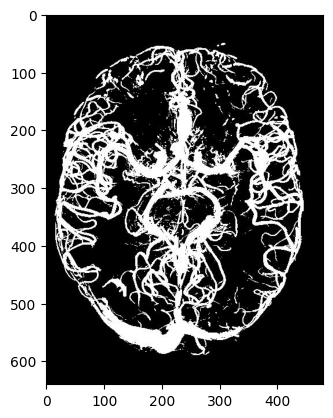

In [10]:
# display the deskulled mip
from utils.eval_utils import mra_deskull

msk_path = "./../py_data/masks/sub017_BFC_mask.nii"
img_path = "./../single_data/thresh_seg_sub017_new/threshSeg_sub017.nii.gz"

mra_deskull(img_path, msk_path, mip_flag=True)

plt.figure()
sub15 = plt.imread("./../single_data/thresh_seg_sub017_new/MASKED_threshSeg_sub017.jpg")
plt.imshow(sub15, cmap='gray')